In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.95'
sys.path.append('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/')

In [2]:
from copy import deepcopy

import optax
import numpy as np
from sklearn.model_selection import ParameterGrid

from utils import grid_script
from config import default_naive_gnn_config
from experiments.script_gnn_prec import script_gnn_prec

In [3]:
seed = 42
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/'
folder = 'results_cases/29.01_elliptic_grid64_128_naive_gnn'

In [5]:
data_config = {
    'data_dir': path,
    'pde': np.nan,
    'grid': np.nan,
    'variance': np.nan,
    'lhs_type': np.nan,
    'N_samples_train': 1000,
    'N_samples_test': 200,
    'fill_factor': 1,
    'threshold': 1e-4
}

train_config = {
    'model_type': 'naive_gnn',
    'loss_type': np.nan,
    'batch_size': 8,
    'optimizer': optax.adam,
    'lr': 1e-3,
    'optim_params': {},
    'epoch_num': 700
}

base_config = {
    'path': path,
    'folder_model': folder,
    'folder_log': folder,
    'name': np.nan,
    'model_use': np.nan,
    'save_model': True,
    'cg_maxiter': np.nan,
    'cg_atol': np.nan,
    'data_config': data_config,
    'model_config': default_naive_gnn_config,
    'train_config': train_config,
    'seed': seed
}

# Div-k-grad, 64x64

In [5]:
params_grid = ParameterGrid({
    'model_use': ['train'],
    'cg_maxiter': [500],
    'cg_atol': [1e-12],
    'model_type': ['naive_gnn'],
    'loss_type': ['low_freq_loss'],
    'batch_size': [8],
    'lr': [1e-3],
    'epoch_num': [700],
    'pde': ['div_k_grad'],
    'grid': [32],
    'variance': [.1],#, .5, .7],
    'lhs_type': ['fd'],
    'fill_factor': [1],
    'threshold': [1e-4]
})

grid_script(script_gnn_prec, base_config, params_grid)

Started: 0


2025-01-30 03:08:46.241943: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.4 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
[INFO | root | 2025-01-30 03:08:46] - %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[INFO | root | 2025-01-30 03:08:46] - [GNN precs] script `6mmfo8` started execution.
[INFO | root | 2025-01-30 03:08:46] - Config: {'path': '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/', 'folder_model': 'results_cases/29.01_elliptic_grid64_128_naive_gnn', 'folder_log': 'results_cases/29.01_elliptic_grid64_128_naive_gnn', 'name': '6mmfo8', 'model_use': 'train', 'save_model': True, 'cg_maxiter': 500, 'cg_atol': 1e-12, 'data_config': {'data_dir': '/mnt/local/data/vtrifonov/prec-learni

# Poisson, 64x64, 128x128

In [6]:
params_grid = ParameterGrid({
    'model_use': ['train'],
    'cg_maxiter': [500],
    'cg_atol': [1e-12],
    'model_type': ['naive_gnn'],
    'loss_type': ['low_freq_loss'],
    'batch_size': [8],
    'lr': [1e-3],
    'epoch_num': [2500],
    'pde': ['poisson'],
    'grid': [128],
    'variance': [.5],
    'lhs_type': ['fd'],
    'fill_factor': [1],
    'threshold': [1e-4]
})

grid_script(script_gnn_prec, base_config, params_grid)

Started: 0


2025-01-31 00:17:55.542245: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.4 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
[INFO | root | 2025-01-31 00:17:56] - %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[INFO | root | 2025-01-31 00:17:56] - [GNN precs] script `b3agaq` started execution.
[INFO | root | 2025-01-31 00:17:56] - Config: {'path': '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/', 'folder_model': 'results_cases/29.01_elliptic_grid64_128_naive_gnn', 'folder_log': 'results_cases/29.01_elliptic_grid64_128_naive_gnn', 'name': 'b3agaq', 'model_use': 'inference', 'save_model': True, 'cg_maxiter': 500, 'cg_atol': 1e-12, 'data_config': {'data_dir': '/mnt/local/data/vtrifonov/prec-le

TypeError: 'bool' object is not subscriptable

In [26]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/'
data_config = {
    'data_dir': path,
    'pde': 'poisson',
    'grid': 128,
    'variance': .5,
    'lhs_type': 'fd',
    'N_samples_train': np.nan,
    'N_samples_test': 200,
    'fill_factor': np.nan,
    'threshold': np.nan
}

train_config = {
    'model_type': 'naive_gnn',
    'loss_type': np.nan,
    'batch_size': 8,
    'optimizer': optax.adam,
    'lr': 1e-3,
    'optim_params': {},
    'epoch_num': 700
}

config = {
    'path': path,
    'folder_model': folder,
    'folder_log': folder,
    'name': 'edbpd1',
    'model_use': 'inference',
    'save_model': False,
    'cg_maxiter': 500,
    'cg_atol': 1e-12,
    'data_config': data_config,
    'model_config': default_naive_gnn_config,
    'train_config': train_config,
    'seed': seed
}

In [27]:
from experiments.script_gnn_prec import script_gnn_prec
out = script_gnn_prec(config, return_meta_data=True)

[INFO | root | 2025-01-31 00:27:07] - %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[INFO | root | 2025-01-31 00:27:07] - [GNN precs] script `edbpd1` started execution.
[INFO | root | 2025-01-31 00:27:07] - Config: {'path': '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/', 'folder_model': 'results_cases/29.01_elliptic_grid64_128_naive_gnn', 'folder_log': 'results_cases/29.01_elliptic_grid64_128_naive_gnn', 'name': 'edbpd1', 'model_use': 'inference', 'save_model': False, 'cg_maxiter': 500, 'cg_atol': 1e-12, 'data_config': {'data_dir': '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/', 'pde': 'poisson', 'grid': 128, 'variance': 0.5, 'lhs_type': 'fd', 'N_samples_train': nan, 'N_samples_test': 200, 'fill_factor': nan, 'threshold': nan}, 'model_config': {'layer_type': 'ConstantConv1d', 'node_enc': {'features': [1, 16, 16], 'N_layers': 2}, 'edge_enc': {'features': [1, 16, 16], 'N_layers': 2}, 'edge_dec': {'features': [16, 16, 1], 'N_layers': 2}, 'mp': {'edge_upd'

In [ ]:
data/vtrifonov/prec-learning-Notay-loss/results_cases/29.01_elliptic_grid64_128_naive_gnn/edbpd1/edbpd1.log

In [ ]:
exit()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases/29.01_elliptic_grid64_128_naive_gnn/'

In [3]:
df = pd.read_csv(os.path.join(path, 'meta_data.csv'), index_col=0)

pd.set_option('display.max_columns', 500)

In [13]:
df

,model_use,cg_maxiter,cg_atol,seed,model_type,use_nodes,node_upd_mlp,static_diag,aggregate_edges,loss_type,batch_size,lr,epoch_num,pde,grid,variance,lhs_type,N_samples_train,N_samples_test,fill_factor,threshold,train_loss,test_loss,alpha,time_data,time_train,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12,time_1e_3,time_1e_6,time_1e_9,time_1e_12,nans_1e_3,nans_1e_6,nans_1e_9,nans_1e_12,t_gnn_prec
7pac81,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,div_k_grad,64.0,0.5,fd,1000.0,200.0,1.0,0.0001,119500.0,116500.0,-,1.1780,1142.0,"[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]",200.0,200.0,200.0,200.0,"[4.057e-04, 1.022e-04]"
mfmse7,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,div_k_grad,32.0,0.5,fd,1000.0,200.0,1.0,0.0001,7848.0,8201.0,-,0.5789,336.2,"[429.0, 37.93]","[454.0, 0.00]","[nan, nan]","[nan, nan]","[0.5537, 0.0495]","[0.5831, 0.0000]","[nan, nan]","[nan, nan]",186.0,199.0,200.0,200.0,"[4.142e-04, 1.276e-05]"
qcdazh,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,div_k_grad,32.0,0.1,fd,1000.0,200.0,1.0,0.0001,906.5,955.6,-,0.5767,335.2,"[61.2, 5.85]","[79.9, 7.42]","[97.1, 9.22]","[114.0, 10.84]","[0.0803, 0.0076]","[0.1045, 0.0096]","[0.1268, 0.0119]","[0.1486, 0.0140]",0.0,0.0,0.0,0.0,"[3.067e-04, 3.332e-05]"
vwnk3q,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,poisson,32.0,0.5,fd,1000.0,200.0,1.0,0.0001,234.0,236.9,-,0.1727,329.6,"[22.0, 0.25]","[29.0, 0.00]","[35.0, 0.00]","[42.0, 0.00]","[0.0299, 0.0004]","[0.0392, 0.0003]","[0.0471, 0.0003]","[0.0563, 0.0003]",0.0,0.0,0.0,0.0,"[3.065e-04, 3.141e-05]"
wncg6l,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,poisson,64.0,0.5,fd,1000.0,200.0,1.0,0.0001,1110.0,1110.0,-,1.0630,1139.0,"[33.0, 0.00]","[43.0, 0.00]","[51.0, 0.00]","[60.0, 0.00]","[0.0733, 0.0008]","[0.0950, 0.0009]","[0.1124, 0.0009]","[0.1319, 0.0010]",0.0,0.0,0.0,0.0,"[4.076e-04, 6.705e-05]"
nyczlm,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,poisson,128.0,0.5,fd,1000.0,200.0,1.0,0.0001,409500.0,388900.0,-,3.4060,4410.0,"[112.6, 0.91]","[146.0, 0.00]","[167.8, 0.76]","[197.7, 0.46]","[1.2697, 0.5724]","[1.6480, 0.7315]","[1.8941, 0.8367]","[2.2208, 0.9694]",0.0,0.0,0.0,0.0,"[1.052e-03, 2.784e-04]"
w4qlpz,train,2500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,poisson,128.0,0.5,fd,1000.0,200.0,1.0,0.0001,409500.0,388900.0,-,3.7490,4412.0,"[112.6, 0.91]","[146.0, 0.00]","[167.8, 0.76]","[197.7, 0.46]","[0.8056, 0.1208]","[1.0438, 0.1576]","[1.1986, 0.1807]","[1.4112, 0.2122]",0.0,0.0,0.0,0.0,"[1.052e-03, 2.808e-04]"
6mmfo8,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,div_k_grad,32.0,0.1,fd,1000.0,200.0,1.0,0.0001,906.5,955.6,-,0.6603,336.7,"[61.2, 5.85]","[79.9, 7.42]","[97.1, 9.22]","[114.0, 10.84]","[0.0812, 0.0077]","[0.1056, 0.0097]","[0.1281, 0.0121]","[0.1501, 0.0142]",0.0,0.0,0.0,0.0,"[3.074e-04, 4.264e-05]"
edbpd1,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,2500.0,poisson,128.0,0.5,fd,1000.0,200.0,1.0,0.0001,4958.0,4954.0,-,3.3560,15720.0,"[51.0, 0.00]","[64.0, 0.00]","[77.0, 0.00]","[89.9, 0.25]","[1.0226, 0.1246]","[1.2814, 0.1530]","[1.5368, 0.1749]","[1.7913, 0.1968]",0.0,0.0,0.0,0.0,"[1.056e-03, 2.497e-04]"


In [5]:
df.loc[['qcdazh'], :]

,model_use,cg_maxiter,cg_atol,seed,model_type,use_nodes,node_upd_mlp,static_diag,aggregate_edges,loss_type,batch_size,lr,epoch_num,pde,grid,variance,lhs_type,N_samples_train,N_samples_test,fill_factor,threshold,train_loss,test_loss,alpha,time_data,time_train,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12,time_1e_3,time_1e_6,time_1e_9,time_1e_12,nans_1e_3,nans_1e_6,nans_1e_9,nans_1e_12,t_gnn_prec
qcdazh,train,500.0,1.000000e-12,42.0,naive_gnn,True,True,True,sum,low_freq_loss,8.0,0.001,700.0,div_k_grad,32.0,0.1,fd,1000.0,200.0,1.0,0.0001,906.5,955.6,-,0.5767,335.2,"[61.2, 5.85]","[79.9, 7.42]","[97.1, 9.22]","[114.0, 10.84]","[0.0803, 0.0076]","[0.1045, 0.0096]","[0.1268, 0.0119]","[0.1486, 0.0140]",0.0,0.0,0.0,0.0,"[3.067e-04, 3.332e-05]"


In [22]:
0.00029*51

0.01479

In [15]:
import glob

In [16]:
ls_ = ['qcdazh', 'vwnk3q', 'wncg6l', 'nyczlm']
ls_ = ['edbpd1']

In [17]:
p_ = glob.glob(os.path.join(path, '*/'))

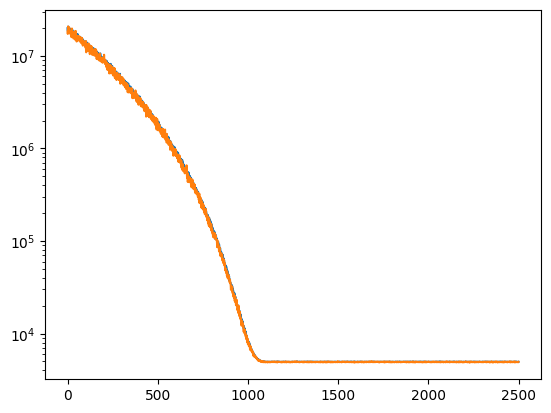

In [18]:
i = 0
f = np.load(os.path.join(path, ls_[i], 'losses_'+ls_[i]+'.npz'))
plt.plot(range(len(f['train_loss'])), f['train_loss'], label='train')
plt.plot(range(len(f['test_loss'])), f['test_loss'], label='test')
plt.yscale('log')

In [ ]:
list(f.keys())